# 🔬 Dental X‑ray Interpretability Notebook
*Occlusion • LIME • RISE — for YOLOv11 detections on the “Fillings” class*

---

## 1 Why this notebook?

Deep object detectors (YOLOv11 in our case) can be opaque.  
This notebook lets us **visualise and quantify** *where* the model looks when it predicts a *Filling* in an intra‑oral bite‑wing:

1. **Choose examples** — true‑positives, false‑positives or false‑negatives, optionally filtered by confidence range.  
2. **Generate three attribution maps** per example:  
   - **Occlusion sensitivity** (patch‑wise masking)  
   - **LIME** (super‑pixel perturbations)  
   - **D‑RISE** (random mask ensemble)  
3. **Overlay & save** colour‑coded masks to disk and/or display inline.  
4. **Record simple metrics** (hot‑pixel fraction, coverage) for later analysis.

> **Key idea**: By comparing how much of each saliency mask falls *inside* the reference bounding‑box we get an intuitive “is the model looking at the right tooth?” proxy.




/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'img_path': '/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images/0021_jpg.rf.0d2cd31b4786f6121d2241aa8c595bf9.jpg', 'box_ref': array([     100.86,      80.907,      125.45,      116.63], dtype=float32), 'conf': 0.8937181234359741, 'kind': 'TP'}]


  0%|          | 0/2000 [00:00<?, ?it/s]/Volumes/L/L_PHAS0077/yolo/interpretability_methods/heatmap_methods.py:195: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  ious = box_iou(torch.tensor([ref_box_xyxy]), torch.tensor(boxes)).numpy()[0]
100%|██████████| 2000/2000 [02:07<00:00, 15.69it/s]


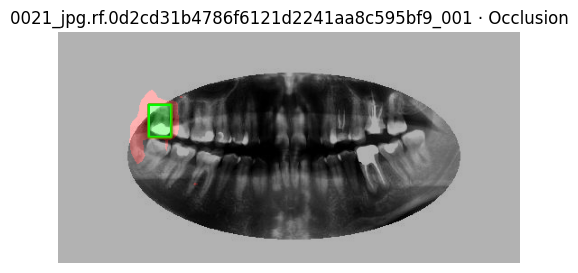

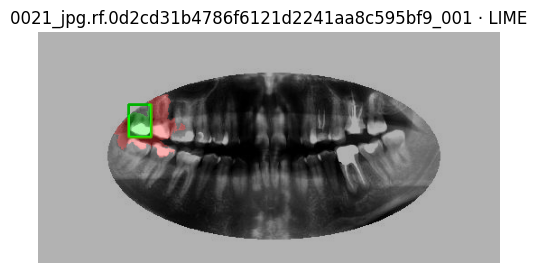

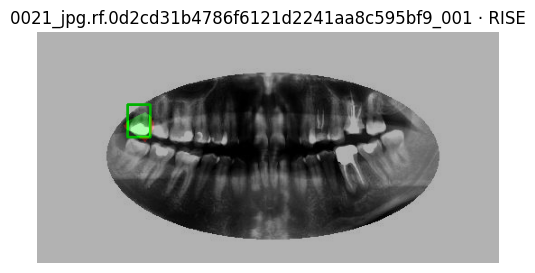

[{'img_path': '/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images/0021_jpg.rf.0d2cd31b4786f6121d2241aa8c595bf9.jpg', 'box_ref': array([     100.86,      80.907,      125.45,      116.63], dtype=float32), 'conf': 0.8937181234359741, 'kind': 'TP'}]


100%|██████████| 2000/2000 [01:59<00:00, 16.69it/s]


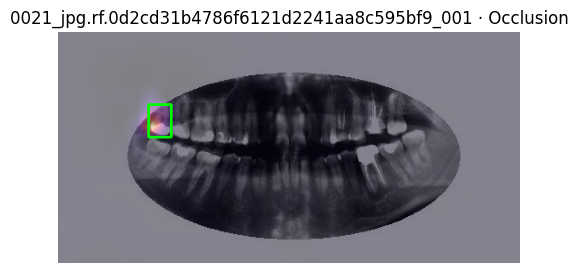

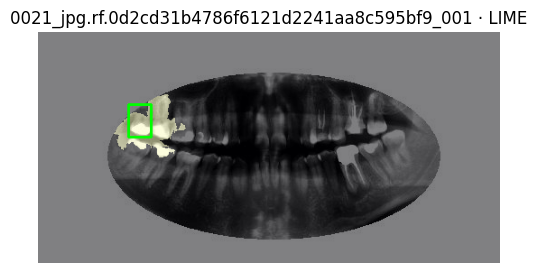

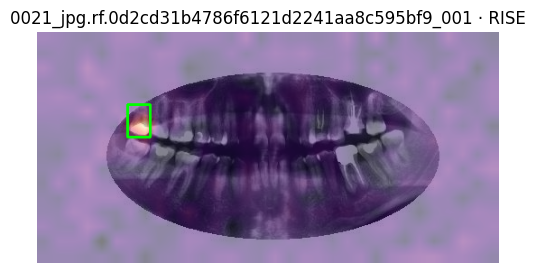

In [3]:
from main import generate_examples

generate_examples("TP", (0.6, 0.9), n_samples=1, heatmap_mode="mask", show_inline=True)

generate_examples("TP", (0.6, 0.9), n_samples=1, heatmap_mode="raw", show_inline=True)

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'img_path': '/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images/0003_jpg.rf.ca9d51a22c825737b49a5f73d3172d23.jpg', 'box_ref': array([     324.42,      112.42,      361.79,       173.3], dtype=float32), 'conf': 0.9198804497718811, 'kind': 'TP'}]


  0%|          | 0/2000 [00:00<?, ?it/s]/Volumes/L/L_PHAS0077/yolo/interpretability_methods/heatmap_methods.py:195: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  ious = box_iou(torch.tensor([ref_box_xyxy]), torch.tensor(boxes)).numpy()[0]
100%|██████████| 2000/2000 [02:07<00:00, 15.67it/s]


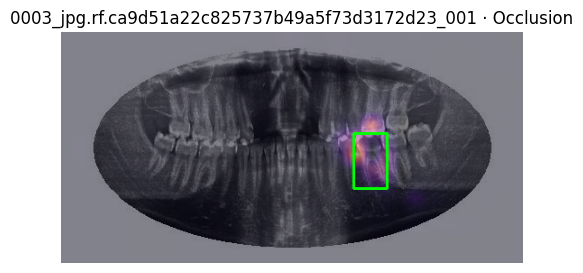

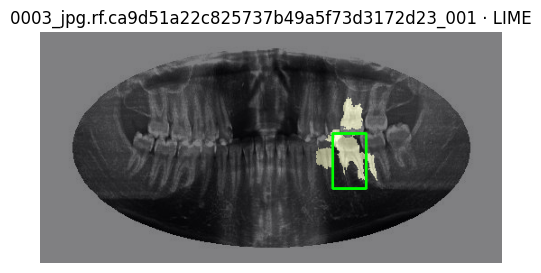

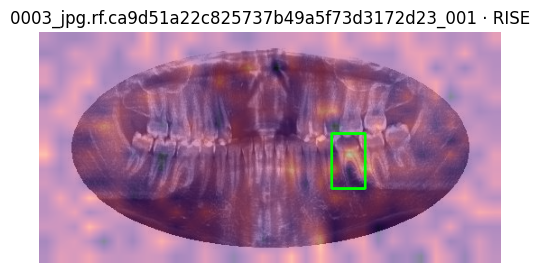

In [ ]:
from main import generate_examples


generate_examples("TP", (0.6, 1.0), n_samples=1, heatmap_mode="raw", show_inline=True, class_name = "Cavity")

### LIME (with multiple boxes)

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DEBUG: VAL_IMAGES_DIR = /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images, exists? True
DEBUG: Found 121 .jpg files


/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/ultralytics/utils/ops.py:282: UserWarning: MPS: nonzero op is supported natively starting from macOS 14.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:404.)
  x, xk = x[filt], xk[filt]
100%|██████████| 1000/1000 [00:55<00:00, 18.02it/s]


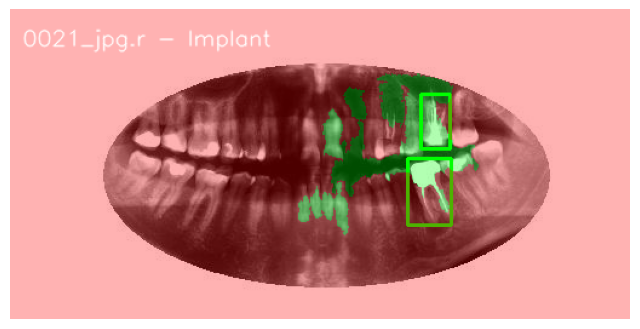

In [ ]:
from main import explain_multiple_boxes_lime  # adjust path if needed

explain_multiple_boxes_lime(
    case_type="TP",              # or "FP", "FN", etc.
    conf_range=(0.8, 1),       # confidence range of interest
    n_samples=1,                 # number of examples to explain
    class_name="Implant",        # target class (match your dataset's naming)
    show_inline=True,            # set to False if running outside notebook
)



### Grad-Cam

Using device: mps


/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/ultralytics/utils/ops.py:282: UserWarning: MPS: nonzero op is supported natively starting from macOS 14.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:404.)
  x, xk = x[filt], xk[filt]


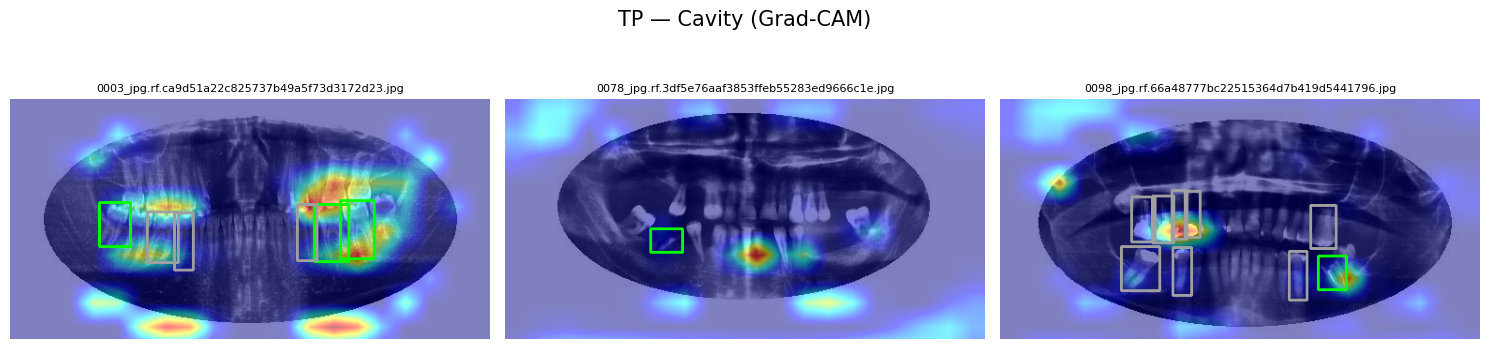

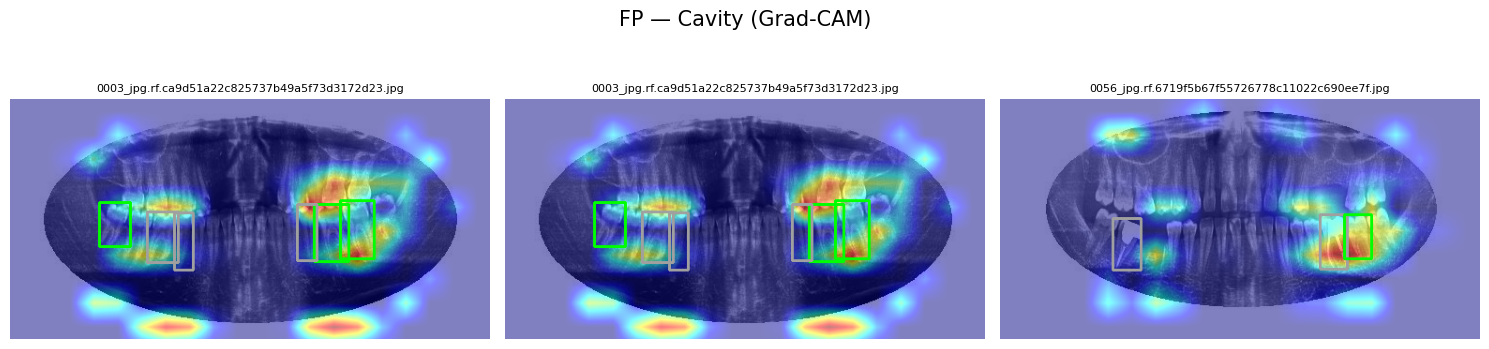

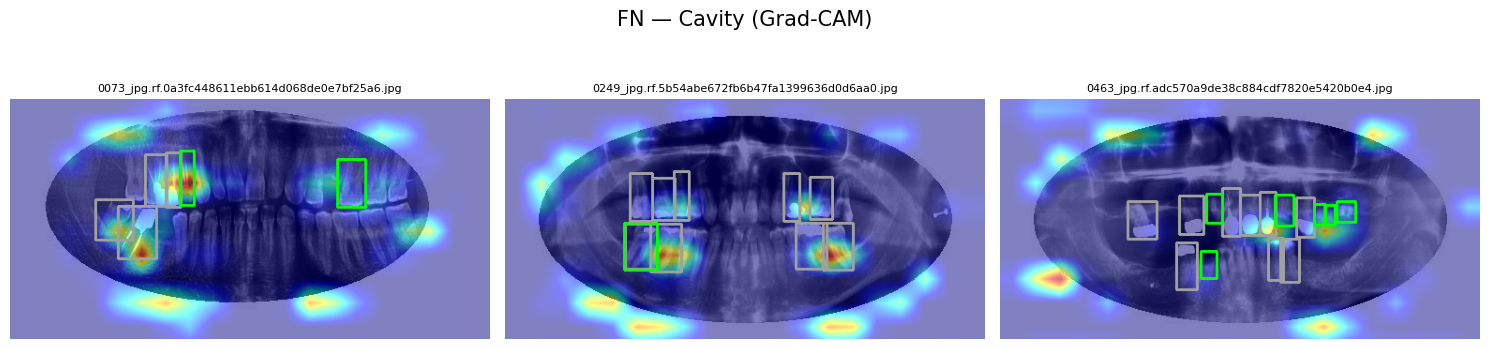

In [1]:
from gradcam_yolo_dental import main    

main()

### Grad-Cam vs LIME

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/ultralytics/utils/ops.py:282: UserWarning: MPS: nonzero op is supported natively starting from macOS 14.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:404.)
  x, xk = x[filt], xk[filt]
100%|██████████| 500/500 [00:26<00:00, 18.98it/s]


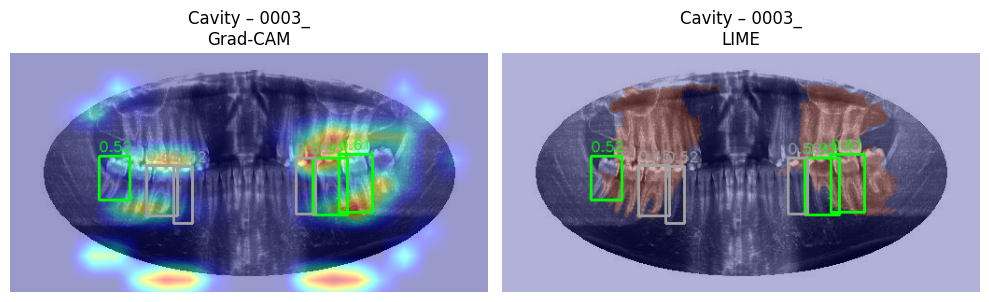

100%|██████████| 500/500 [00:26<00:00, 18.60it/s]


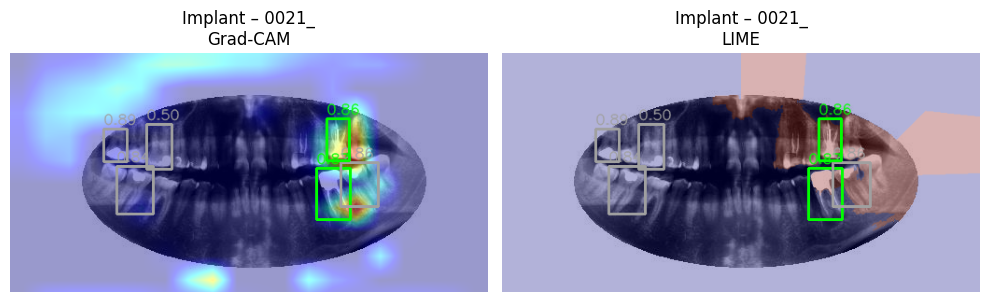

100%|██████████| 500/500 [00:33<00:00, 14.73it/s]


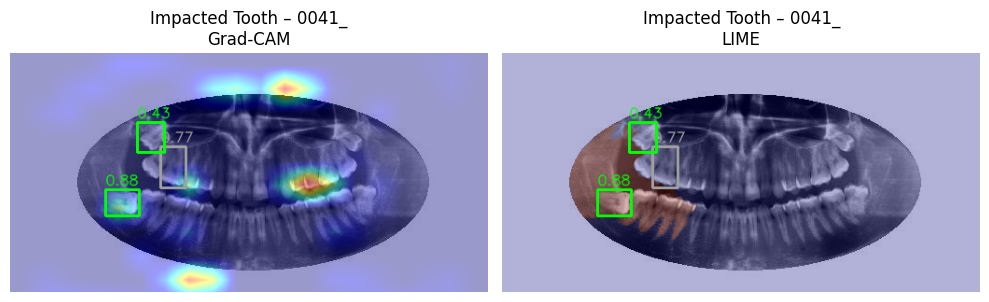

100%|██████████| 500/500 [00:24<00:00, 20.41it/s]


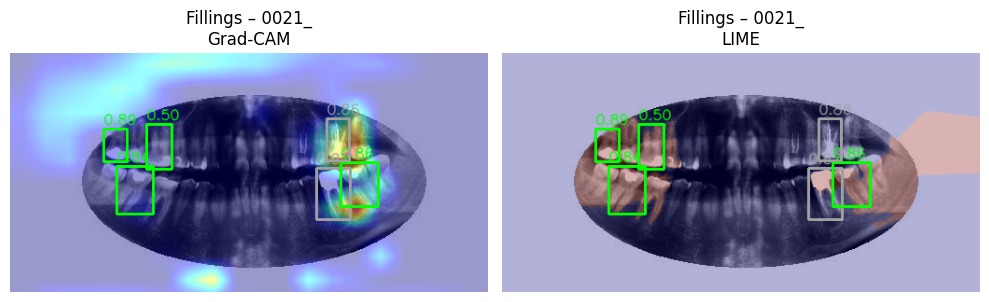

In [1]:
from run_gradcam_lime import main

main()

- Green bounding boxes are detections of your target class.
- Gray bounding boxes (if any) would be detections of other classes.



### SHAP

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] Explaining image: 0098_jpg.rf.66a48777bc22515364d7b419d5441796.jpg


100%|██████████| 1/1 [05:48<00:00, 348.39s/it]

[INFO] SHAP explanation completed in 348.43 seconds


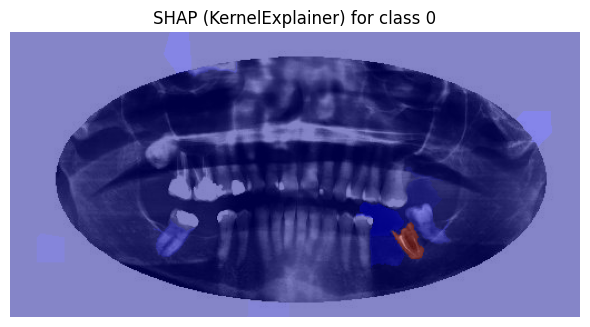

In [ ]:
from shap_yolo_explainer import main

main()

## Run & Save Result

In [6]:
from pathlib import Path

from ultralytics import YOLO
from config import DEVICE, MODEL_CHECKPOINT
from generate_interpretability_plots_save import generate_interpretability_plots

# Your custom settings
OUTPUT_DIR  = Path("./interpretability_plots/all")
CLASS_NAMES = ["Cavity", "Impacted Tooth", "Implant", "Fillings"]

CASE_TYPES  = ["TP", "FP", "FN"]
CONF_RANGE  = (0.25, 1.0)
N_SAMPLES   = 330
OCC_PCT     = 98.0
RISE_PCT    = 99.5
MODEL  = YOLO(str(MODEL_CHECKPOINT)).to(DEVICE).eval()

# Existing model (already on the right device)
generate_interpretability_plots(
    output_dir=OUTPUT_DIR,
    class_names=CLASS_NAMES,
    case_types=CASE_TYPES,
    conf_range=CONF_RANGE,
    n_samples=N_SAMPLES,
    occ_pct=OCC_PCT,
    rise_pct=RISE_PCT,
    model=MODEL          # the YOLO model you created earlier
)


Resuming with 805 records already in CSV
→ Cavity/TP: skipping first 26 samples
→ Cavity/FP: skipping first 35 samples
→ Cavity/FN: skipping first 17 samples
→ Impacted Tooth/TP: skipping first 31 samples
→ Impacted Tooth/FP: skipping first 13 samples
→ Impacted Tooth/FN: skipping first 7 samples
→ Implant/TP: skipping first 156 samples
→ Implant/FP: skipping first 16 samples
→ Implant/FN: skipping first 3 samples
→ Fillings/TP: skipping first 330 samples
→ Fillings/FP: skipping first 129 samples
→ Fillings/FN: skipping first 42 samples
Done! 805 total records written to interpretability_plots/all/records_overlay_stats_all_classes.csv


# Quantitative Analysis (LIME, OCC, RISE)

In [1]:
from pathlib import Path
from quantitative_analysis_plots import correlation_summary, load_ratios, load_stats
from typing import Dict
from matplotlib import pyplot as plt


csv_stats = "interpretability_plots/all/records_overlay_stats_all_classes.csv"
csv_ratios=  "combined_embeddings_with_ratios_norm.csv"
out_dir_path = "interpretability_plots/quantitative_analysis_plots"

CLASS_NAMES: Dict[int, str] = {
    0: "Cavity",
    1: "Implant",
    2: "Fillings",
    3: "Impacted Tooth",
}

stats = load_stats(csv_stats)
ratios = load_ratios(csv_ratios)
out_dir = Path(out_dir_path)




/Volumes/L/L_PHAS0077/yolo/interpretability_methods/quantitative_analysis_plots.py:890: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.95])


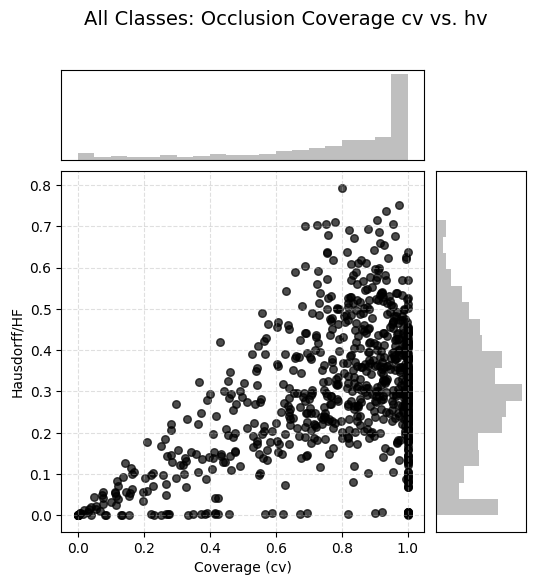

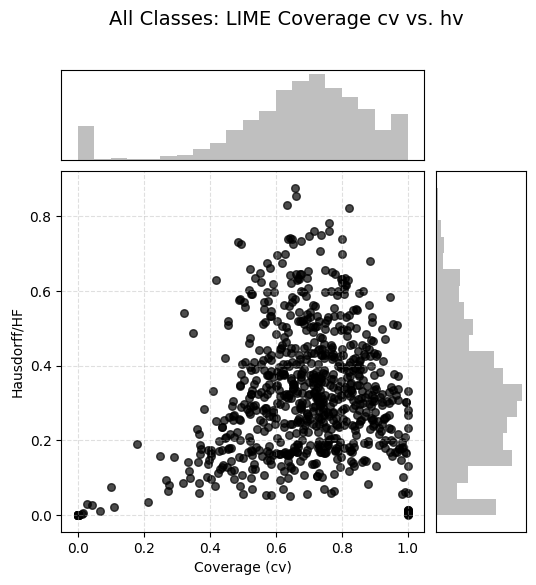

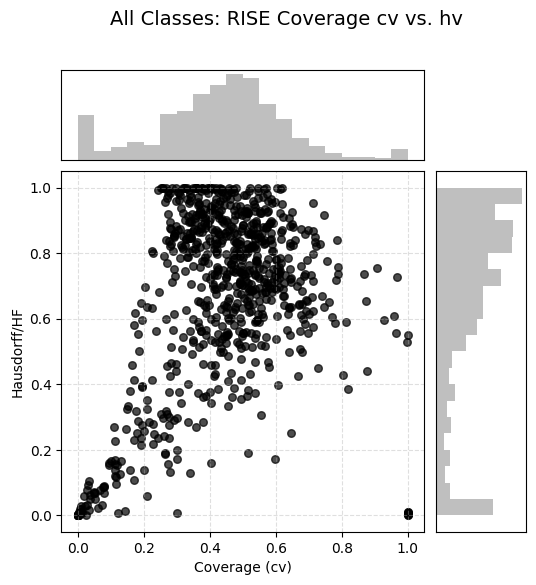

In [2]:
from quantitative_analysis_plots import plot_cv_vs_hv


fig = plot_cv_vs_hv(
    df=stats,
    cls_id='all',                        # or "all"
    methods=["occ_cv","lime_cv", 'rise_cv'],   # or None for all METHODS.keys()
    out_file="outputs/cv_hv_scatter.png"
)

## Darkness vs Missing Density plot

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


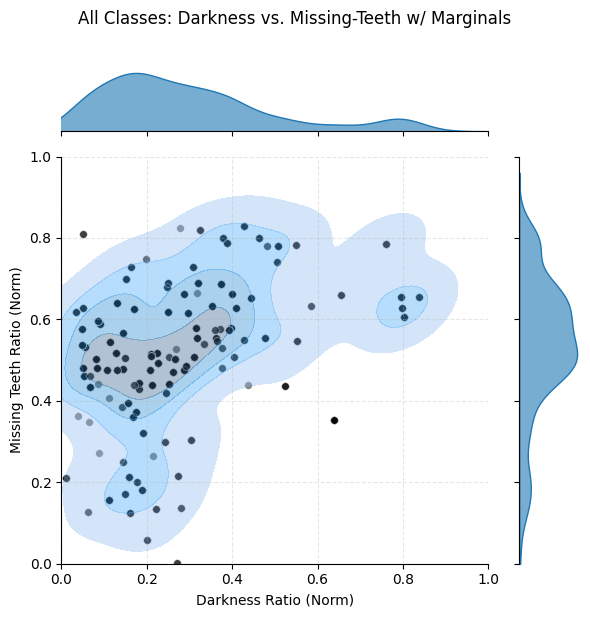

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


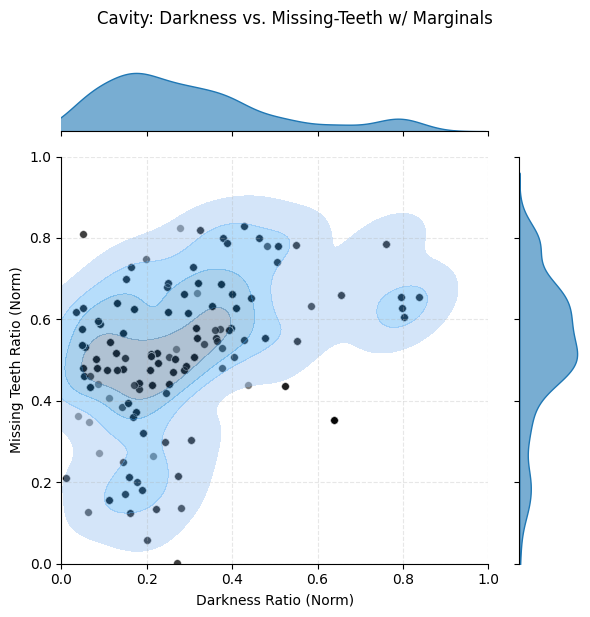

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


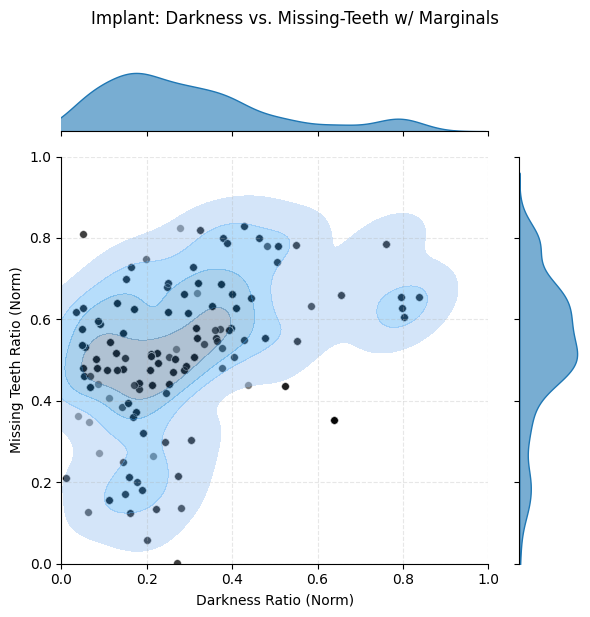

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


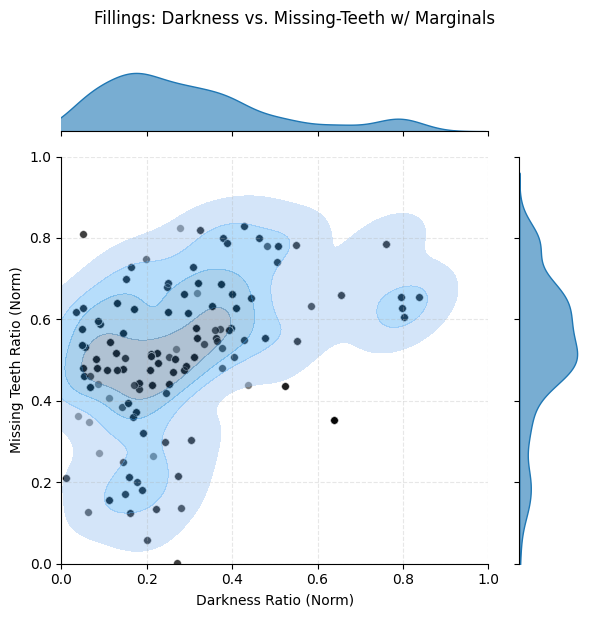

/Users/hananalaskar/miniforge3/envs/yolov11_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


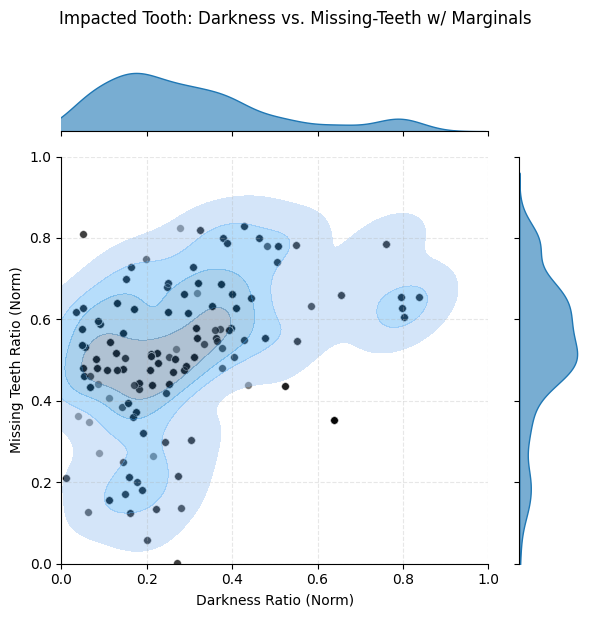

In [3]:
# 1) Joint + marginals for All Classes

from quantitative_analysis_plots import plot_darkness_missing_with_marginals


fig1 = plot_darkness_missing_with_marginals(
    stats,
    ratios,
    cls_id="all",
    out_file=out_dir_path+"/dark_miss_all_jointmarg.png"
)

In [4]:
# 2) Marginal-only KDEs by class
from quantitative_analysis_plots import plot_marginal_distributions_per_case


fig2 = plot_marginal_distributions_per_case(
    stats,
    ratios,
    case_types=["TP","FP", 'FN'],               # only include TP and FP
    out_dir=out_dir_path+"/dark_miss_marginals"
)


/Volumes/L/L_PHAS0077/yolo/interpretability_methods/quantitative_analysis_plots.py:441: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Saved All Cases marginal plot to interpretability_plots/quantitative_analysis_plots/dark_miss_marginals/marginals_all.png


/Volumes/L/L_PHAS0077/yolo/interpretability_methods/quantitative_analysis_plots.py:441: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Saved Case = TP marginal plot to interpretability_plots/quantitative_analysis_plots/dark_miss_marginals/marginals_tp.png


/Volumes/L/L_PHAS0077/yolo/interpretability_methods/quantitative_analysis_plots.py:441: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Saved Case = FP marginal plot to interpretability_plots/quantitative_analysis_plots/dark_miss_marginals/marginals_fp.png
Saved Case = FN marginal plot to interpretability_plots/quantitative_analysis_plots/dark_miss_marginals/marginals_fn.png


/Volumes/L/L_PHAS0077/yolo/interpretability_methods/quantitative_analysis_plots.py:441: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [5]:
from quantitative_analysis_plots import kruskal_summary_per_case


kruskal_summary_per_case(
    df_stats=stats,
    df_ratios=ratios,
    case_types=["TP","FP", 'FN'],  # drop FN automatically
    alpha=0.05
)




=== Kruskal–Wallis Across Classes ===

-- Combined cases (TP, FP, FN) --
   Darkness:       H = 1.91, p = 0.591 (ns)
   Missing-Teeth:  H = 14.76, p = 0.002 (significant)

-- Case = TP --
   Darkness:       H = 4.03, p = 0.259 (ns)
   Missing-Teeth:  H = 15.34, p = 0.002 (significant)

-- Case = FP --
   Darkness:       H = 4.88, p = 0.181 (ns)
   Missing-Teeth:  H = 5.09, p = 0.166 (ns)

-- Case = FN --
   Darkness:       H = 4.25, p = 0.235 (ns)
   Missing-Teeth:  H = 3.95, p = 0.267 (ns)



## Threshold Coverage (aggragte level)

/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/1481522763.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/1481522763.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/1481522763.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


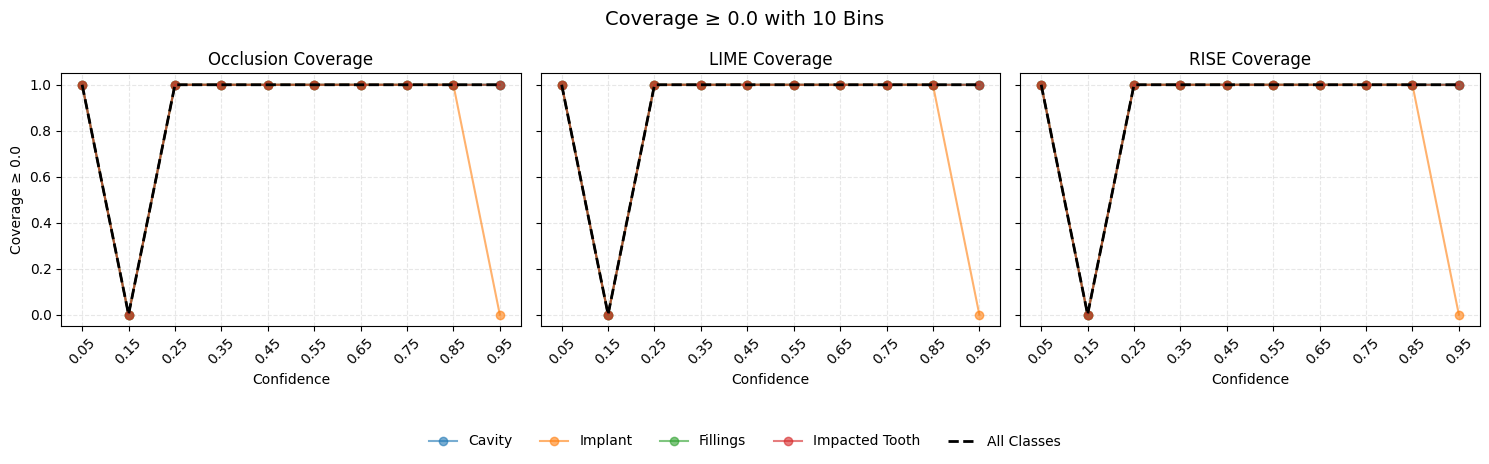

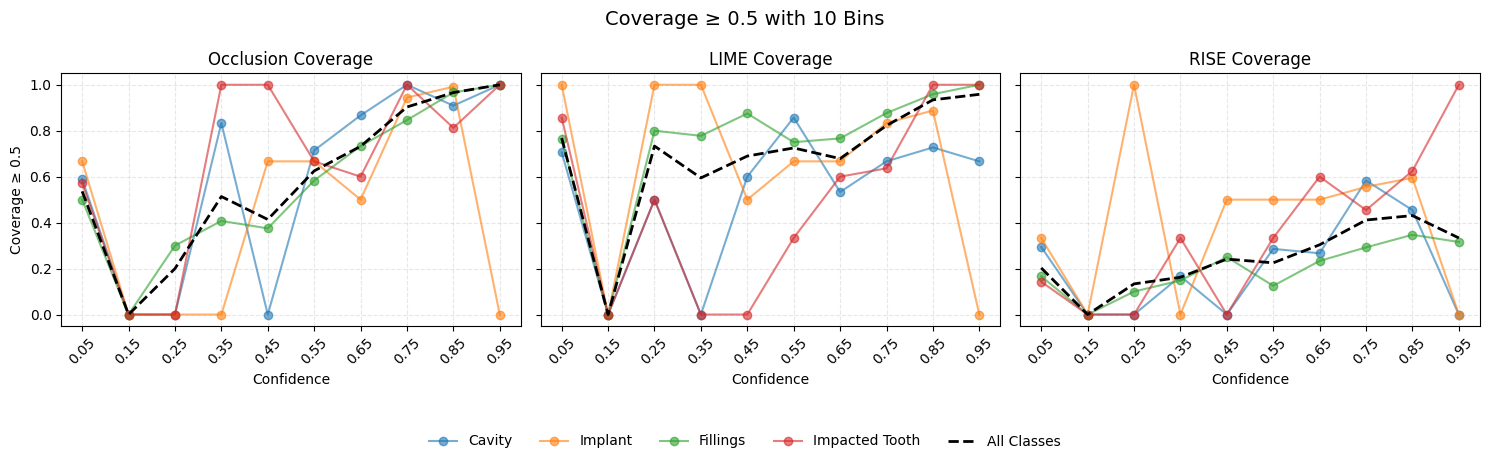

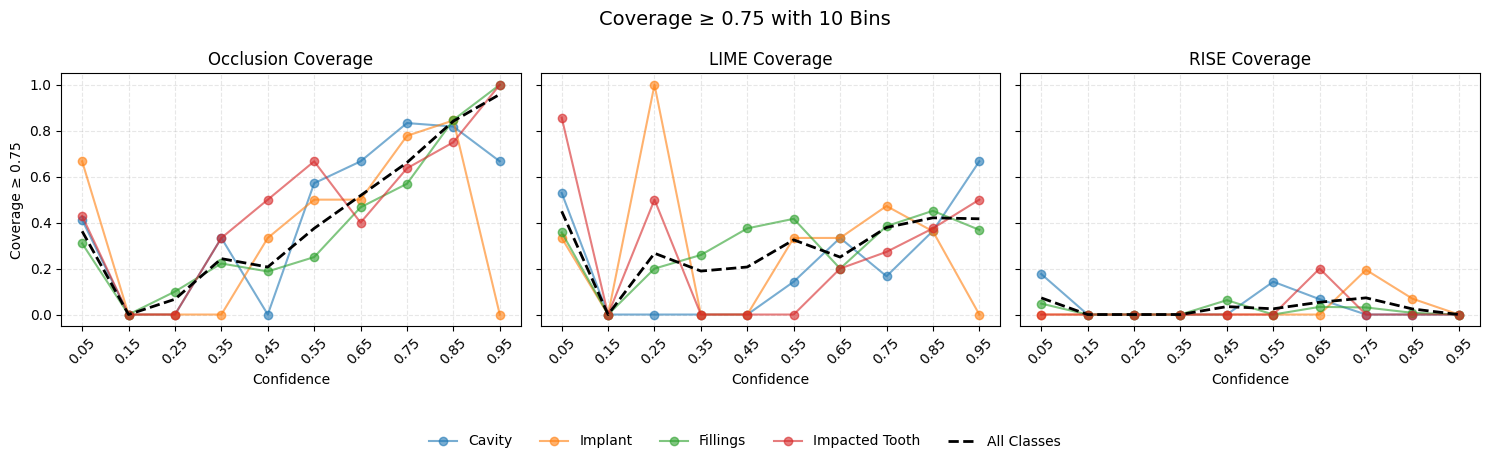

In [6]:
from quantitative_analysis_plots import plot_threshold_coverage


for thr in [0.0, 0.5, 0.75]:
        fig = plot_threshold_coverage(
            stats,
            thr=thr,
            out_file=out_dir / f"coverage_vs_conf_thr{thr}.png",
        )
        if fig is not None:
            fig.show()


Exactly right—those “Coverage ≥ X with 10 Bins” charts are effectively showing, at each confidence bin, the **fraction of samples whose coverage meets or exceeds your threshold** (e.g. 0.75). Because they’re aggregating over all classes (and optionally drawing the dashed “All Classes” line), you can immediately see the *overall* pass-rate for each method as confidence goes up.

From those plots you can read off that:

* **Occlusion** consistently has the highest pass-rate at every coverage threshold.
* **LIME** comes next—its curve runs below Occlusion’s but above RISE’s.
* **RISE** sits lowest, meaning it’s the hardest for RISE masks to clear any fixed coverage bar, especially the tighter ones like ≥ 0.75 or ≥ 0.90.

A couple of caveats worth calling out:

1. **Threshold choice matters.** If you pick a very low bar (≥ 0.0) they all hit 100%, but as you move the cut-point up, differences open up.
2. **Class imbalances can hide nuance.** If one class dominates your dataset and behaves differently (e.g. implants always easy to cover), it will tilt the “All Classes” line. You can still plot per-class threshold curves side-by-side to confirm the ranking holds within each class.
3. **Bin edges matter.** You used 10 equal‐width bins; you could also try quantile bins or finer granularity if you want more resolution at the extremes.

But yes—those threshold‐coverage plots are exactly the right tool to make the simple statement:

> **Occlusion > LIME > RISE** in terms of the fraction of examples whose masks cover at least X% of the ground-truth box, across the range of model confidences.


## Coverage vs. Confidence

/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/2439103614.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/2439103614.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/2439103614.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/2439103614.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/rw/rdbss14n33jcnhgs5r5kyfmh0000gn/T/ipykernel_90599/2439103614.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


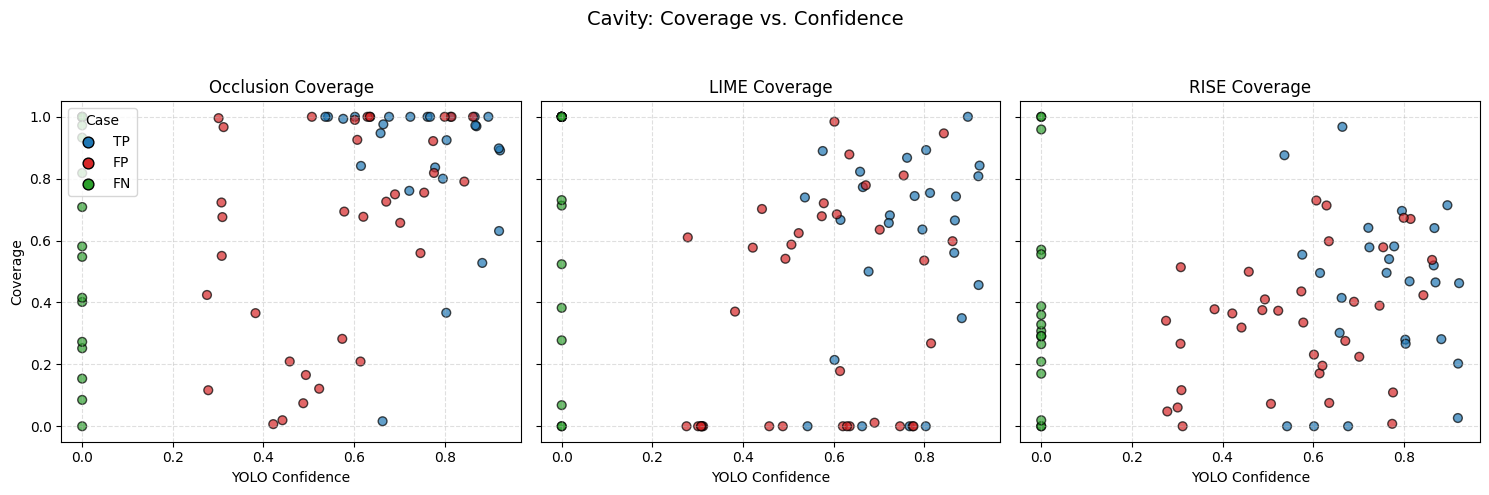

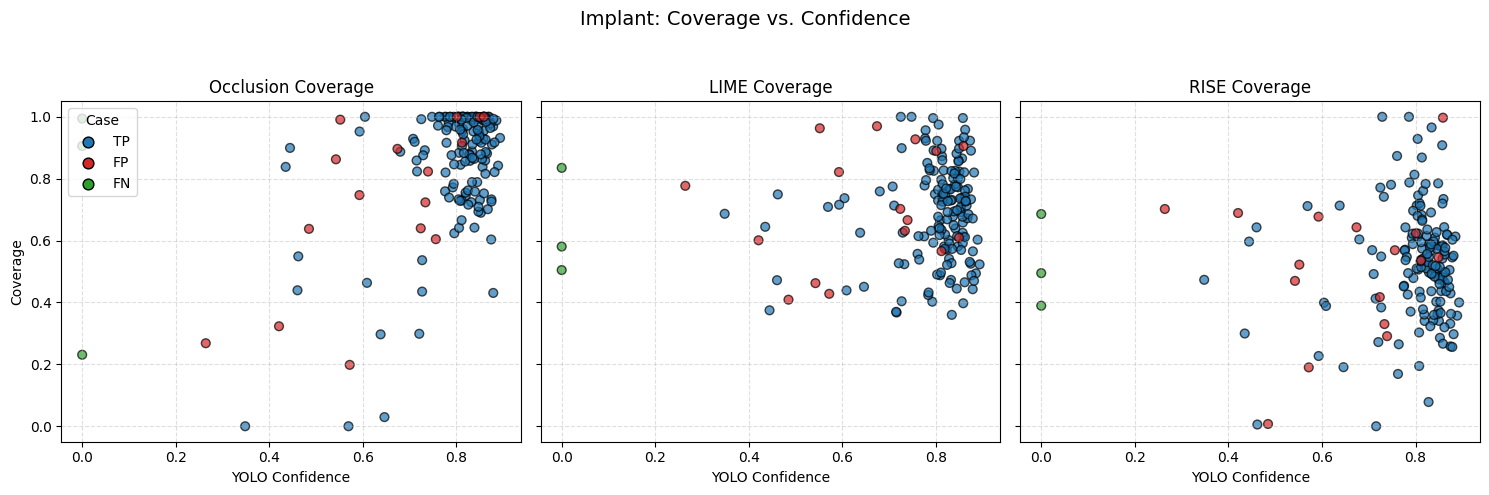

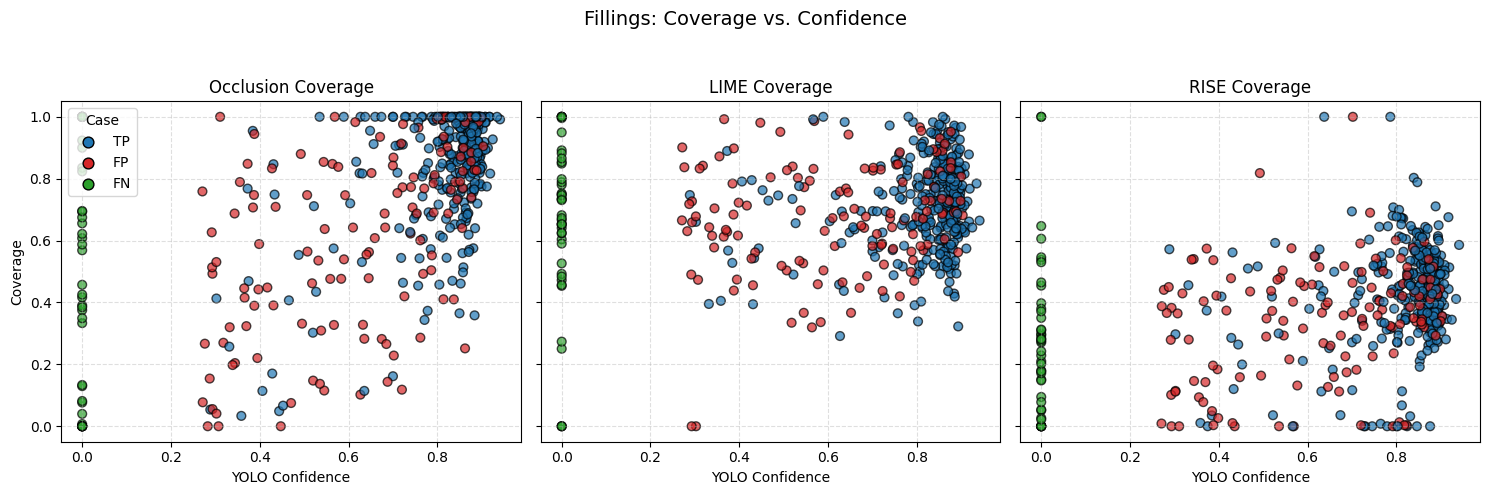

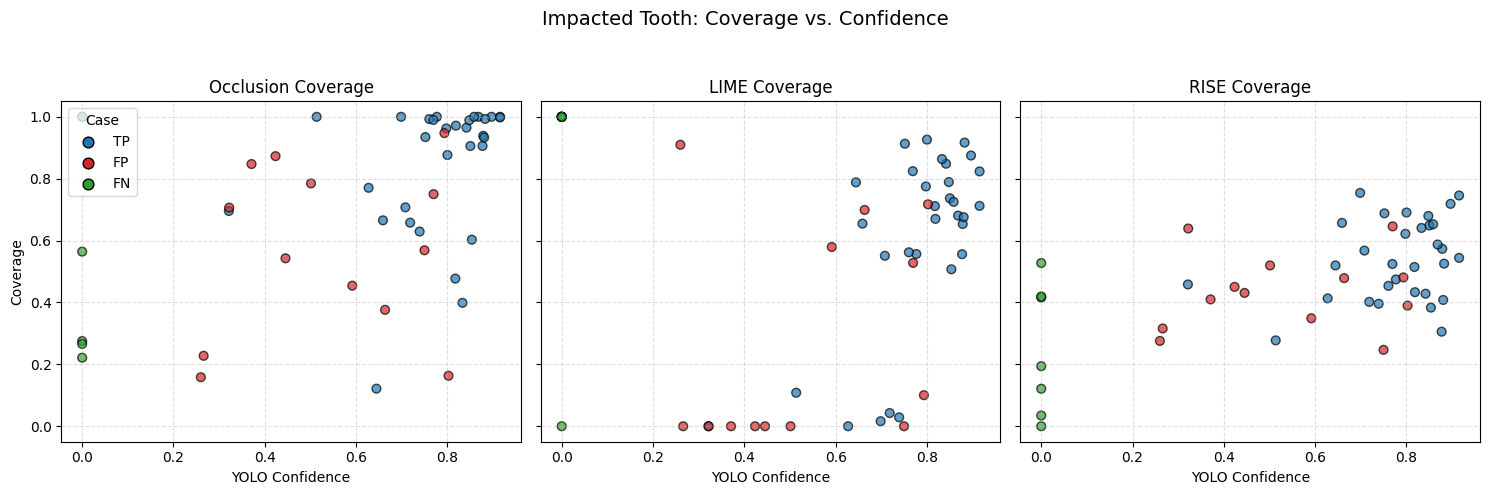

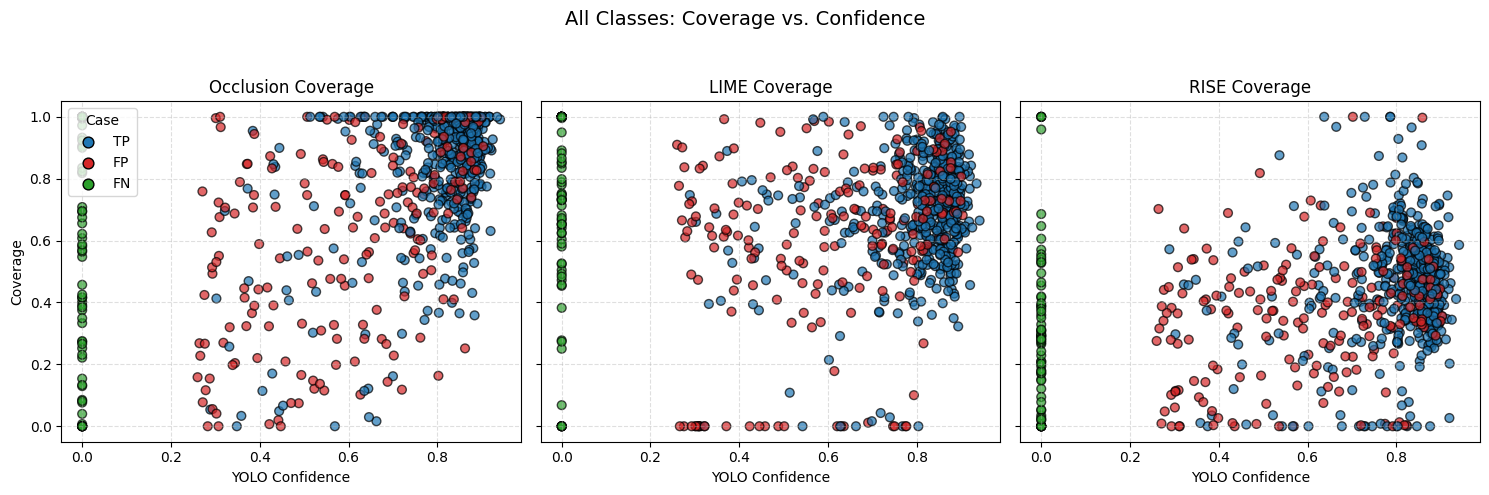

In [7]:

from quantitative_analysis_plots import plot_coverage_scatter



for cid in list(CLASS_NAMES.keys()) + ["all"]:
        
        tag = "all" if cid == "all" else CLASS_NAMES[cid]
        fig = plot_coverage_scatter(
            stats,
            cls_id=cid,
            out_file=out_dir / f"scatter_{tag}.png",
        )
        fig.show()


## Correlation Summary

In [8]:
# 4) Correlation table (CSV + print)
summary = correlation_summary(stats, ratios)
summary.to_csv(out_dir / "correlation_summary.csv", index=False)

summary

scope              method  mean_cov  rho_conf strength_conf  \
0           Cavity  Occlusion Coverage  0.700775  0.326081      moderate   
1           Cavity       LIME Coverage  0.508705 -0.057256          none   
2           Cavity       RISE Coverage  0.385879  0.098751          none   
3          Implant  Occlusion Coverage  0.847589  0.445327      moderate   
4          Implant       LIME Coverage  0.689619  0.113306          weak   
5          Implant       RISE Coverage  0.524062  0.063826          none   
6         Fillings  Occlusion Coverage  0.754105  0.552192      moderate   
7         Fillings       LIME Coverage  0.701448  0.181069          weak   
8         Fillings       RISE Coverage  0.396396  0.340513      moderate   
9   Impacted Tooth  Occlusion Coverage  0.741349  0.369750      moderate   
10  Impacted Tooth       LIME Coverage  0.549531  0.031319          none   
11  Impacted Tooth       RISE Coverage  0.471260  0.594242      moderate   
12             All  Occlusion Coverage  0.768453  0.504520      moderate   
13             All       LIME Coverage  0.670576  0.158163          weak   
14             All       RISE Coverage  0.427873  0.299086          weak   

    rho_dark strength_dark  rho_miss strength_miss  
0   0.117948          weak  0.169155          weak  
1   0.317254      moderate  0.140761          weak  
2   0.158604          weak  0.168131          weak  
3  -0.029189          none  0.094158          none  
4   0.169931          weak  0.020011          none  
5   0.179427          weak  0.286715          weak  
6   0.040564          none  0.104741          weak  
7   0.198230          weak  0.132111          weak  
8  -0.134644          weak  0.084031          none  
9   0.014079          none -0.131635          weak  
10  0.142276          weak  0.332640      moderate  
11  0.040177          none  0.010807          none  
12  0.031409          none  0.092184          none  
13  0.178951          weak  0.124341          weak  
14 -0.037612          none  0.128662          weak

Filtering to classes: ['Cavity', 'Implant', 'Fillings', 'Impacted Tooth']
Showing cases: ['FN']

=== Case: FN (total rows: 69) ===
Occlusion  → 10 where conf∈[0.00,1.00], cov∈[0.40,0.60]


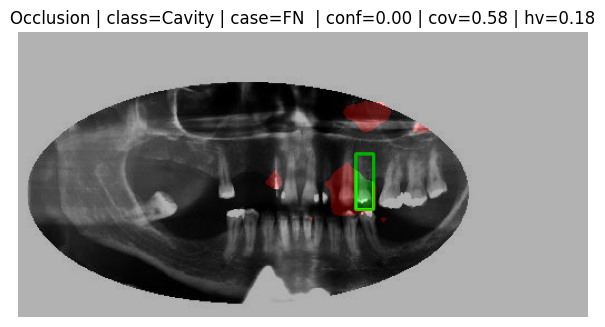

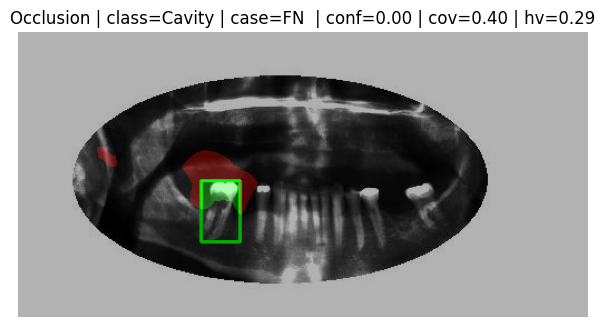

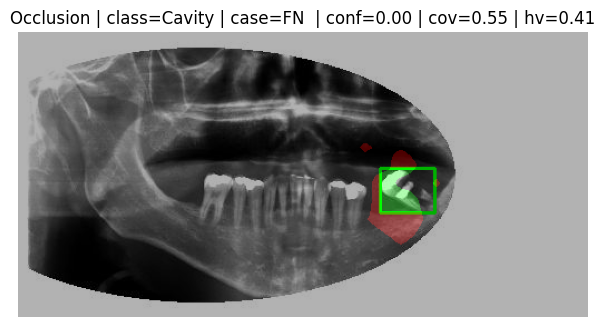

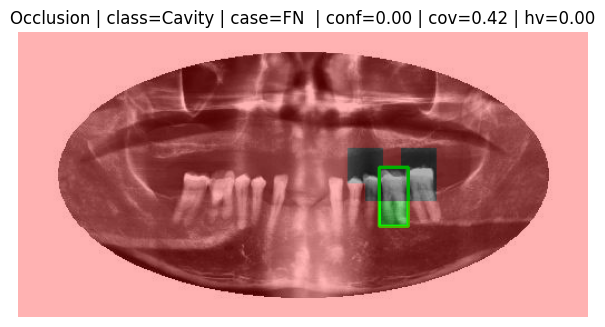

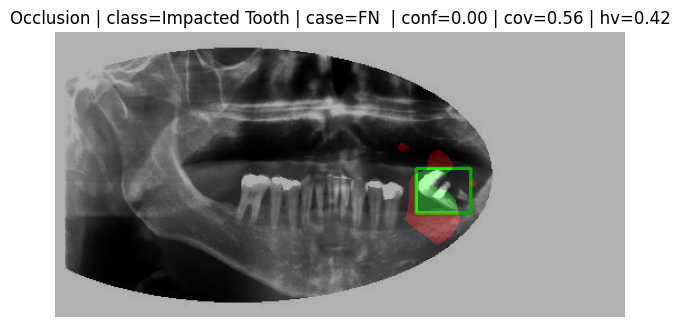

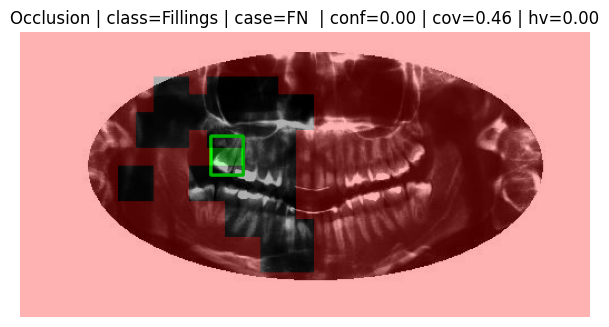

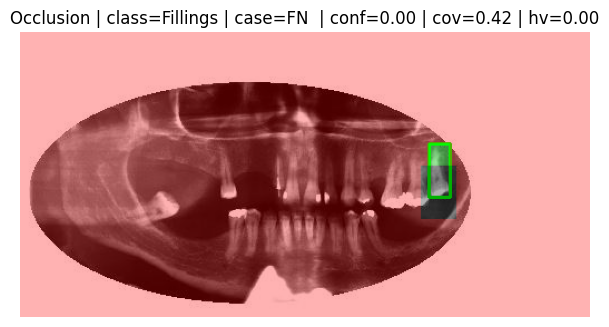

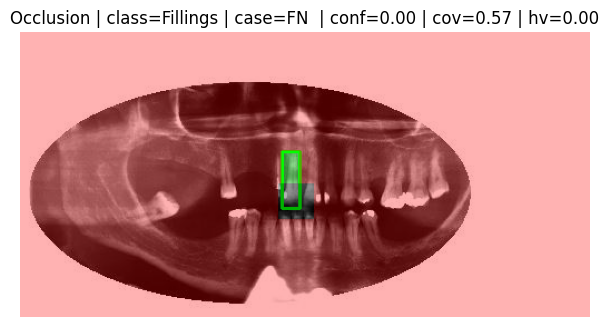

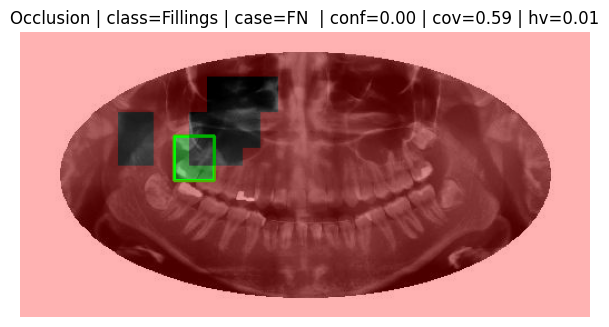

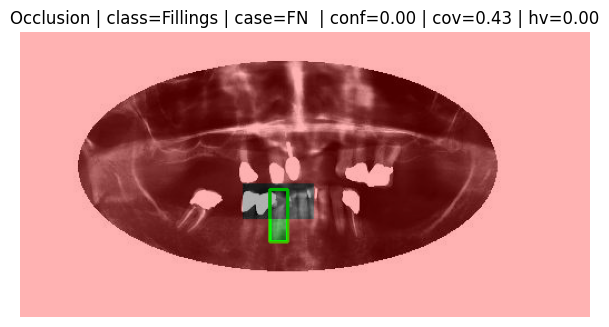

LIME       → 10 where conf∈[0.00,1.00], cov∈[0.40,0.60]


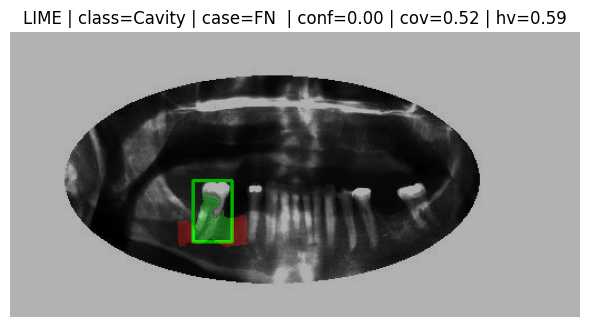

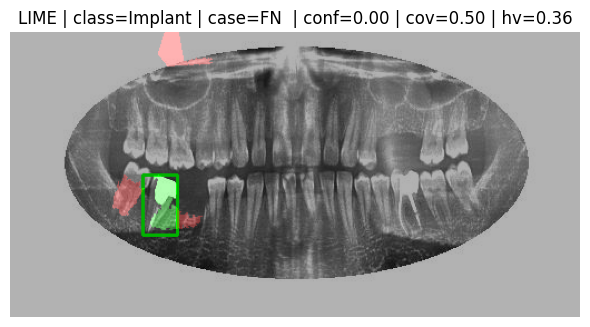

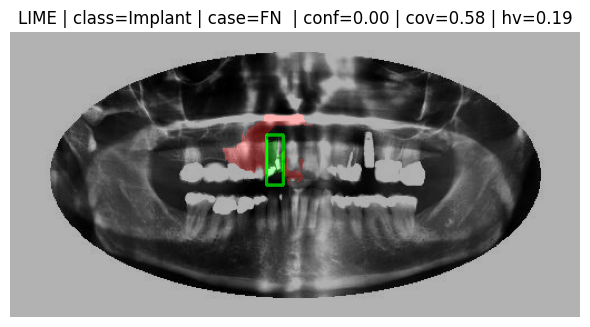

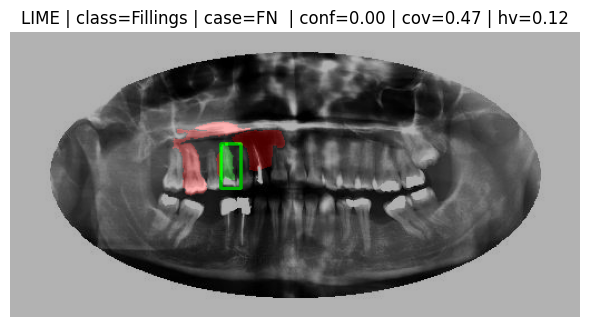

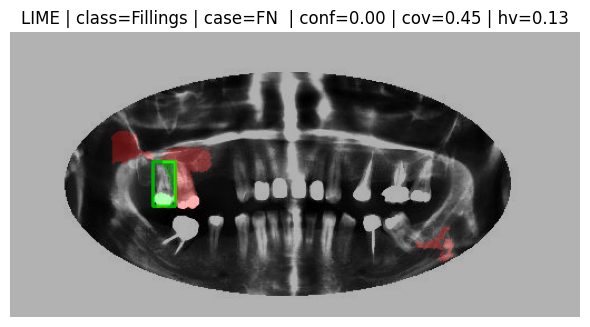

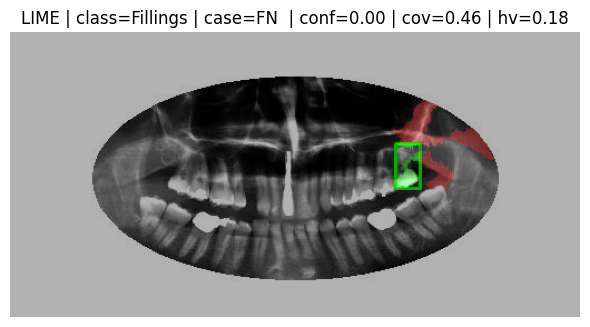

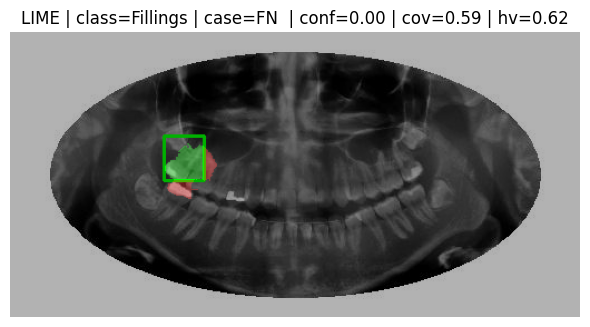

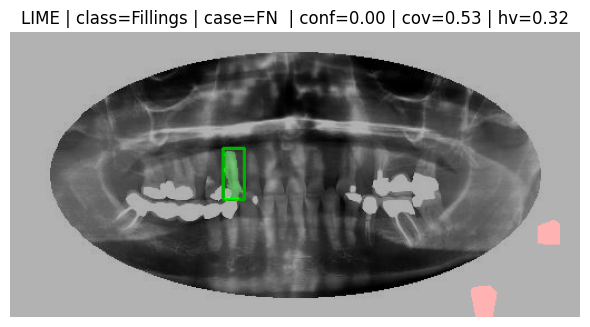

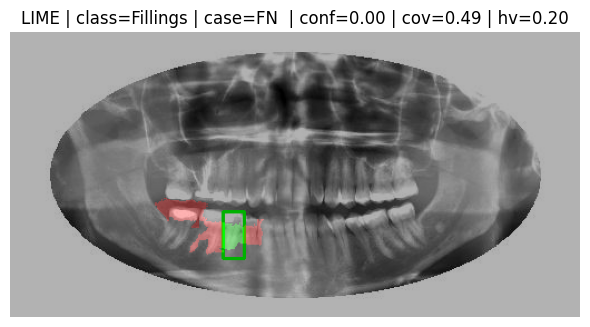

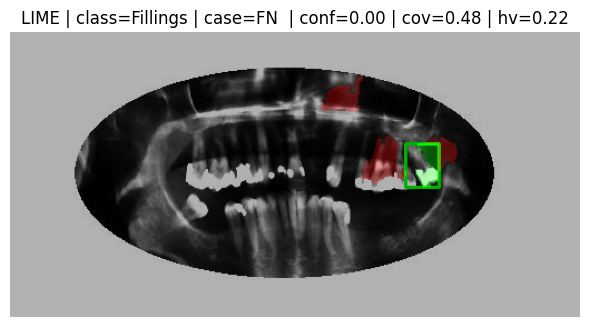

RISE       → 11 where conf∈[0.00,1.00], cov∈[0.40,0.60]


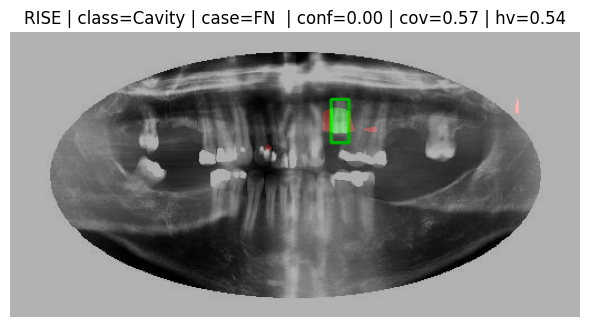

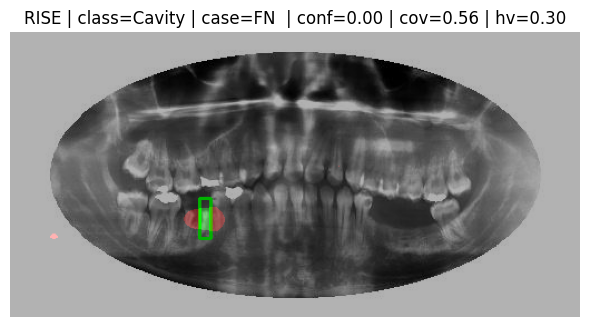

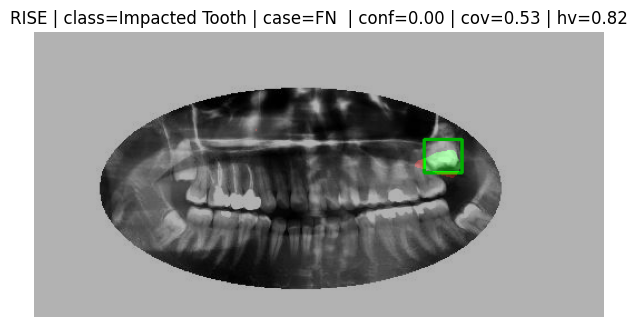

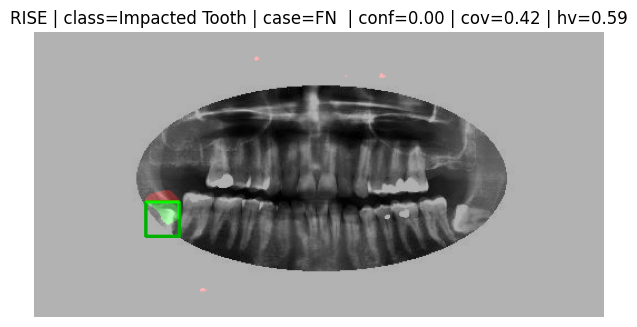

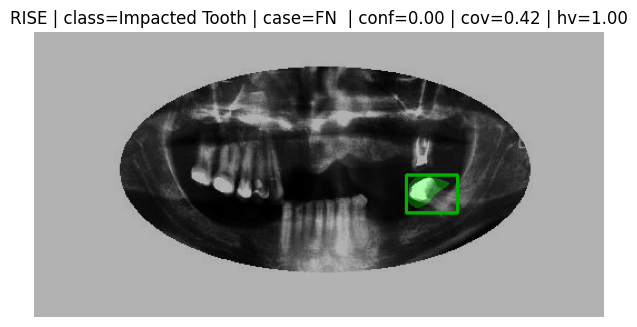

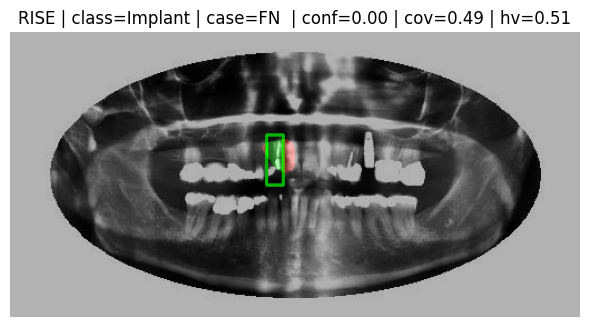

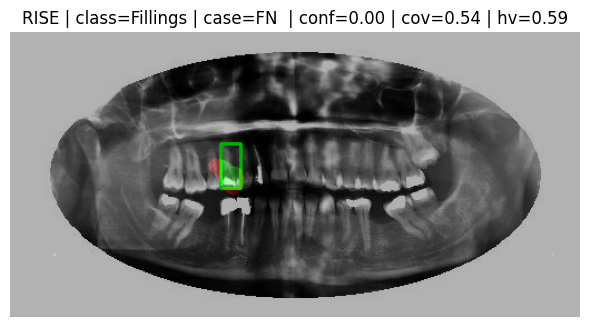

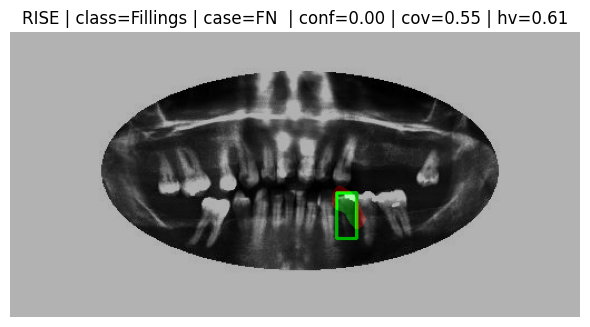

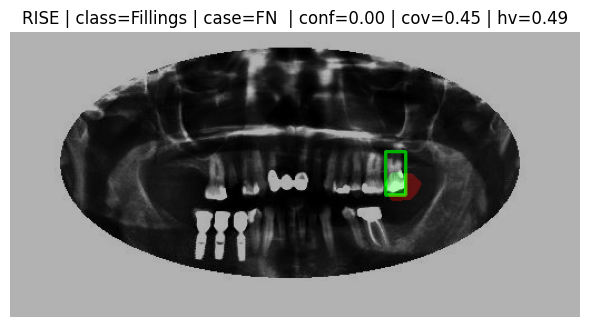

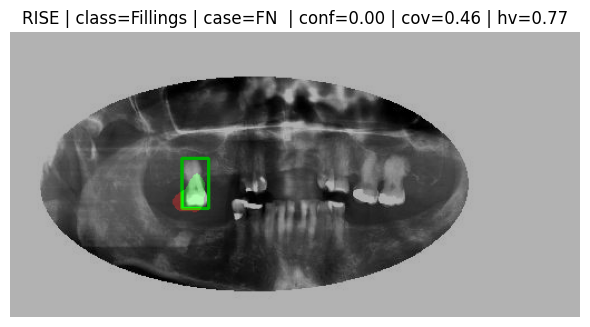

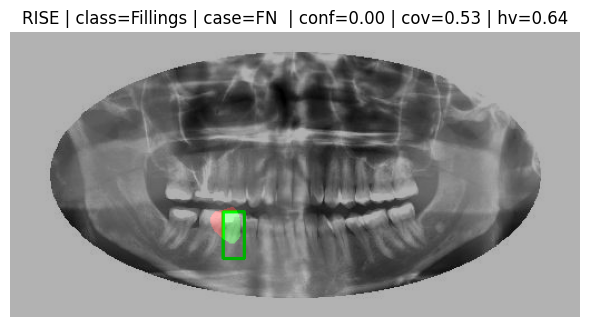

In [15]:
# show_low_coverage_each_method_all_cases.py
# -----------------------------------------------------------------------------
# Display one example overlay for each method and case (TP, FP, FN)
# where confidence ≥ CONF_THRESH but coverage < COV_THRESH.

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from quantitative_analysis_plots import show_low_coverage_examples



# Configuration: use the "all classes" CSV and root plot directory
CSV_STATS   = "interpretability_plots/all/records_overlay_stats_all_classes.csv"
OVERLAY_ROOT = "interpretability_plots/all"
save_root = "interpretability_plots/all/fn_exmaples"
METHODS = {
    'Occlusion': ('occ_cv',  'occlusion'),
    'LIME':      ('lime_cv',  'lime'),
    'RISE':      ('rise_cv',  'rise'),
}

conf_range = (0.0, 1)
cov_range  = (0.4, 0.6)
# CASES = ['TP', 'FP']
CASES = ['FN']
CLASS = ["Cavity", "Implant", "Fillings", "Impacted Tooth"]

max_samples = 30


show_low_coverage_examples(
        csv_stats=CSV_STATS,
        overlay_root=OVERLAY_ROOT,
        conf_range=conf_range,
        cov_range=cov_range,
        class_filter = CLASS,
        case_filter = CASES,
        max_samples=max_samples,
        methods=METHODS
)

